# 결정 트리(Decision Tree)

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [25]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=11
)

In [26]:
dtc = DecisionTreeClassifier(random_state=156)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

- 모델 시각화

In [27]:
from sklearn.tree import export_graphviz
export_graphviz(
    dtc, out_file='tree.dot',
    class_names=iris.target_names,
    feature_names=iris.feature_names,
    impurity=True, filled=True
)

In [28]:
# from sklearn.tree import export_graphviz
# from graphviz import Source

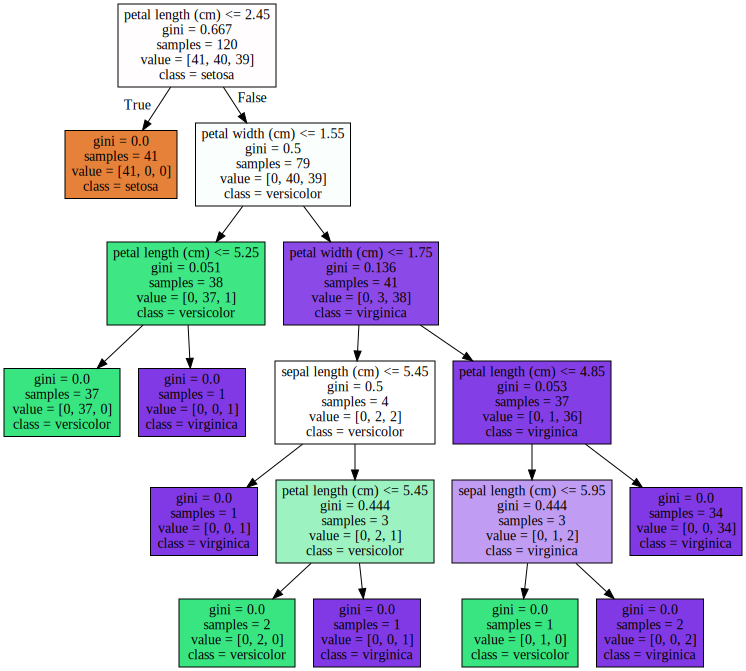

In [29]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

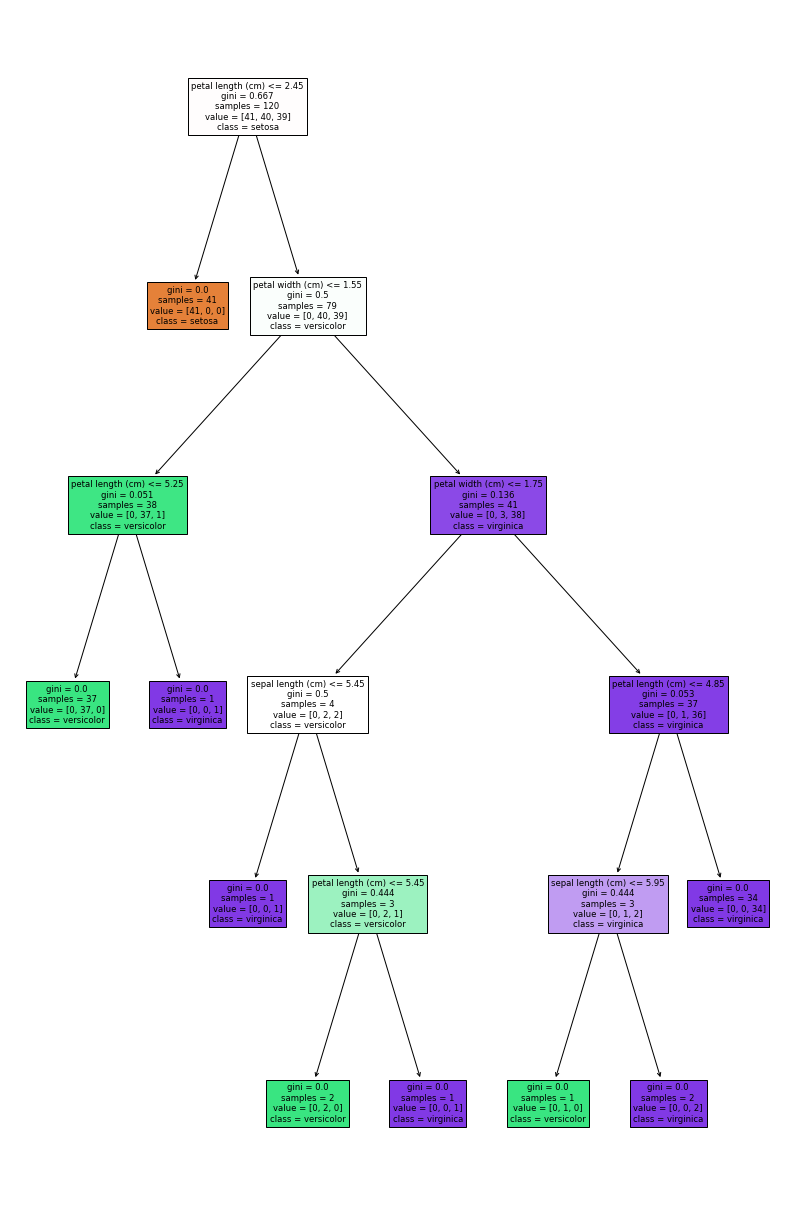

In [30]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(14,22))
plot_tree(dtc, filled=True, class_names=iris.target_names,
    feature_names=iris.feature_names,
)
plt.show()

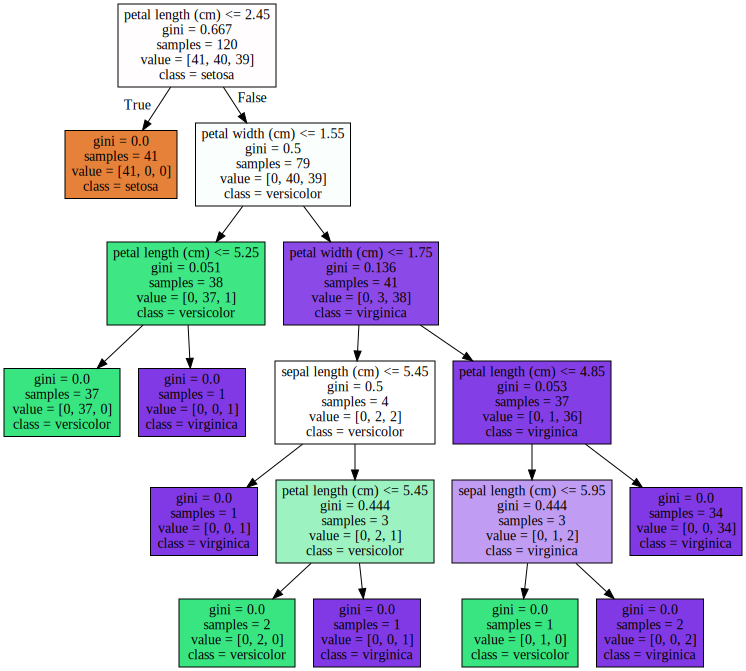

In [31]:
from graphviz import Source
Source.from_file("tree.dot")

#### 제약 조건
- max_depth = 3인 경우

In [32]:
dtc2 = DecisionTreeClassifier(max_depth=3, random_state=156)
dtc2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

In [33]:
export_graphviz(
    dtc2, out_file='tree2.dot',
    class_names=iris.target_names,
    feature_names=iris.feature_names,
    impurity=True, filled=True
)

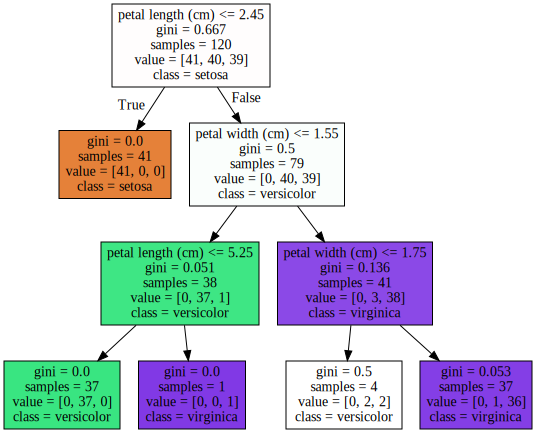

In [34]:
Source.from_file("tree2.dot")

- min_samples_split = 4인 경우

In [35]:
dtc3 = DecisionTreeClassifier(random_state=156, min_samples_split=4)
dtc3.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=4, random_state=156)

In [36]:
export_graphviz(
    dtc3, out_file='tree3.dot',
    class_names=iris.target_names,
    feature_names=iris.feature_names,
    impurity=True, filled=True
)

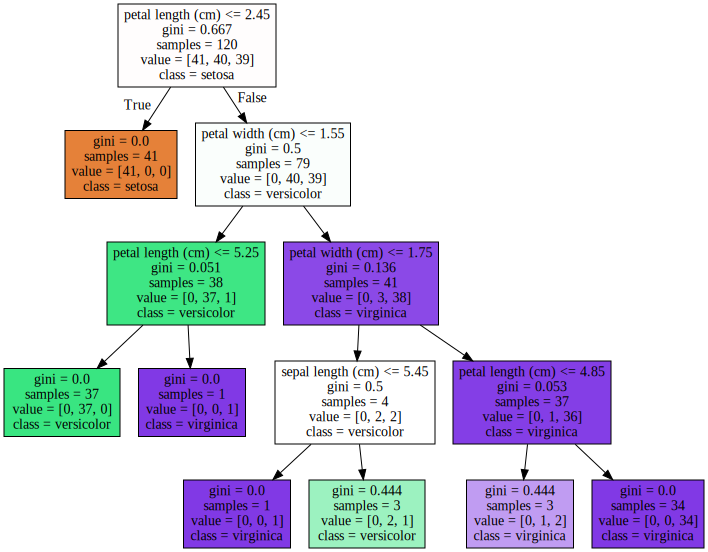

In [37]:
Source.from_file("tree3.dot")

#### 모델 성능

In [38]:
dtc.score(X_test, y_test), dtc2.score(X_test, y_test), dtc3.score(X_test, y_test)

(0.9333333333333333, 0.9333333333333333, 0.9333333333333333)

#### 모델이 제공하는 정보
- Feature Importance

In [39]:
dtc.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

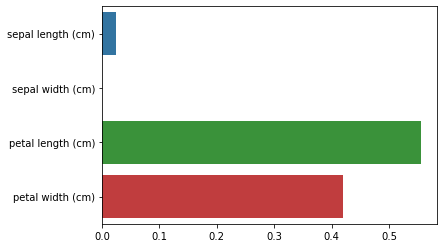

In [40]:
import seaborn as sns
sns.barplot(x=dtc.feature_importances_, y=iris.feature_names)
plt.show()

In [41]:
dtc2.feature_importances_

array([0.        , 0.        , 0.55810743, 0.44189257])

In [42]:
dtc3.feature_importances_

array([0.00862255, 0.        , 0.55679642, 0.43458103])

In [43]:
120 / 5, 240 / 10, 700 / 20, 1050 / 30, 1750/ 50

(24.0, 24.0, 35.0, 35.0, 35.0)